# Heat plot

In [1]:
pip install shapely

You should consider upgrading via the '/Users/budu/miniconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install geopandas

You should consider upgrading via the '/Users/budu/miniconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
%matplotlib inline
import geopandas as gpd
import numpy as np
from scipy import ndimage

import matplotlib.pylab as pylab
import matplotlib.pyplot as plt

#pylab.rcParams['figure.figsize'] = 8, 6


In [4]:
import pandas as pd
data = [
        {'some_attribute': 'abc', 'lat': '50.1234', 'lon': '10.4023'},
        {'some_attribute': 'def', 'lat': '40.5678', 'lon': '8.3365'},
        {'some_attribute': 'ghi', 'lat': '60.9012', 'lon': '6.2541'},
        {'some_attribute': 'jkl', 'lat': '45.3456', 'lon': '12.5478'},
        {'some_attribute': 'mno', 'lat': '35.7890', 'lon': '14.3957'},
        ]

df = pd.DataFrame(data)
print(df)

  some_attribute      lat      lon
0            abc  50.1234  10.4023
1            def  40.5678   8.3365
2            ghi  60.9012   6.2541
3            jkl  45.3456  12.5478
4            mno  35.7890  14.3957


In [5]:
from shapely.geometry import Point

# combine lat and lon column to a shapely Point() object
df['geometry'] = df.apply(lambda x: Point((float(x.lon), float(x.lat))), axis=1)

In [7]:
df = gpd.GeoDataFrame(df, geometry='geometry')

In [8]:
df.to_file('points_demo.shp', driver='ESRI Shapefile')

/Users/budu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  """Entry point for launching an IPython kernel.


In [9]:
pts = gpd.GeoDataFrame.from_file('points_demo.shp')

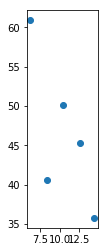

In [10]:
pts.plot()

In [11]:
def heatmap(d, bins=(100,100), smoothing=1.3, cmap='jet'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()

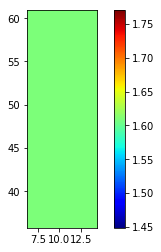

In [12]:
heatmap(pts, bins=1, smoothing=1.5)